In [12]:
import gym
import hiive.mdptoolbox, hiive.mdptoolbox.example, hiive.mdptoolbox.mdp
import hiive.mdptoolbox as mdptoolbox
import hiive.visualization
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42) 
# set this so that in QL taking random actions based upon the value of epsilon, 
# you're generating random numbers consistently to compare against epsilon

N_EPISODES = 1000

In [13]:
# from example https://pymdptoolbox.readthedocs.io/en/latest/api/example.html#module-mdptoolbox.example
# P probability matrix, R reward matrix
# Default 3 states
# 2 actions Wait (a0), Cut (a1).
# state values 0-youngest, -1 oldest
# TODO Make states a large value

# STATES IS WHAT MAKES THIS A LARGE OR SMALL PROBLEM
# do I really want a sparse matrix?
trans_m, reward_m = mdptoolbox.example.forest(S=1000)
print(P)
print(R)

[[[0.1 0.9 0.  ... 0.  0.  0. ]
  [0.1 0.  0.9 ... 0.  0.  0. ]
  [0.1 0.  0.  ... 0.  0.  0. ]
  ...
  [0.1 0.  0.  ... 0.  0.9 0. ]
  [0.1 0.  0.  ... 0.  0.  0.9]
  [0.1 0.  0.  ... 0.  0.  0.9]]

 [[1.  0.  0.  ... 0.  0.  0. ]
  [1.  0.  0.  ... 0.  0.  0. ]
  [1.  0.  0.  ... 0.  0.  0. ]
  ...
  [1.  0.  0.  ... 0.  0.  0. ]
  [1.  0.  0.  ... 0.  0.  0. ]
  [1.  0.  0.  ... 0.  0.  0. ]]]
[[0. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [4. 2.]]


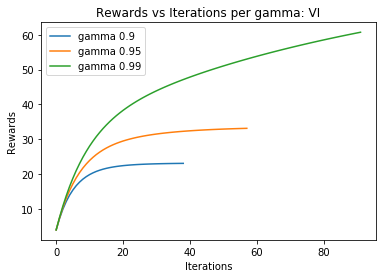

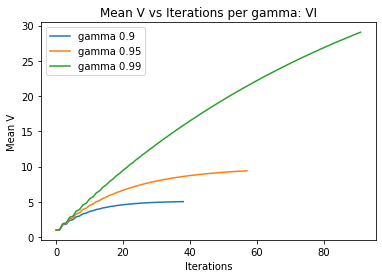

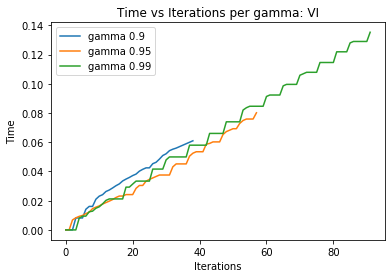

In [14]:
# VALUE ITERATION
# hparams tuning
# gamma
gamma = [.9, .95, .99]

#stopping factor
#epsilon = [.01, .001, .0001, .00001]

for g in gamma:
    vi = mdptoolbox.mdp.ValueIteration(trans_m, reward_m, epsilon=.01 ,gamma=g)
    vi.run()
    
    reward_stats = [stat['Reward'] for stat in vi.run_stats]
    plt.figure(1)
    plt.plot(range(0, vi.iter), reward_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Rewards vs Iterations per gamma: VI")
    plt.ylabel("Rewards")
    plt.xlabel("Iterations")
    plt.savefig('../images/vi_forest/Rewards_vs_Iterations_vi_gamma.png')
    
    
    meanv_stats = [stat['Mean V'] for stat in vi.run_stats]
    plt.figure(2)
    plt.plot(range(0, vi.iter), meanv_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Mean V vs Iterations per gamma: VI")
    plt.ylabel("Mean V")
    plt.xlabel("Iterations")
    plt.savefig('../images/vi_forest/MeanV_vs_Iterations_vi_gamma.png')
    
    time_stats = [stat['Time'] for stat in vi.run_stats]
    plt.figure(3)
    plt.plot(range(0, vi.iter), time_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Time vs Iterations per gamma: VI")
    plt.ylabel("Time")
    plt.xlabel("Iterations")
    plt.savefig('../images/vi_forest/Time_vs_Iterations_vi_gamma.png')

In [22]:
# Show Optimal policy
vi = mdptoolbox.mdp.ValueIteration(trans_m, reward_m, epsilon=.01 ,gamma=.99)
vi.run()
print('iterations:' + str(vi.iter))
print('Time: ' + str(vi.time))
print('Policy: ' + str(vi.policy))
#visualize_policy(vi.policy, rl_type='VI', env_state=env_state)

iterations:92
Time: 0.11933302879333496
Policy: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

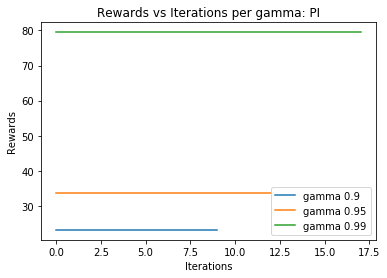

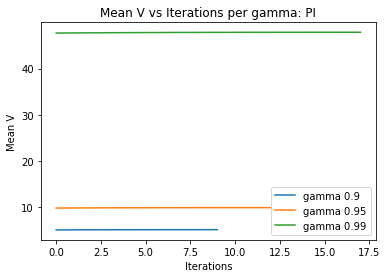

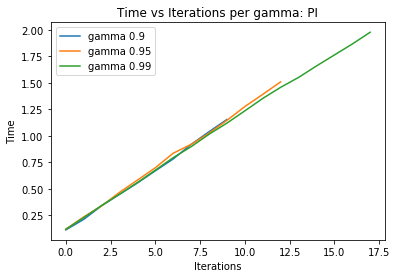

In [16]:
# POLICY ITERATION
# hparams tuning
# gamma
gamma = [.9, .95, .99]

#stopping factor
#epsilon = [.01, .001, .0001, .00001]

for g in gamma:
    pi = mdptoolbox.mdp.PolicyIteration(trans_m, reward_m, gamma=g)
    pi.run()
    
    reward_stats = [stat['Reward'] for stat in pi.run_stats]
    plt.figure(1)
    plt.plot(range(0, pi.iter), reward_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Rewards vs Iterations per gamma: PI")
    plt.ylabel("Rewards")
    plt.xlabel("Iterations")
    plt.savefig('../images/pi_forest/Rewards_vs_Iterations_pi_gamma.png')
    
    
    meanv_stats = [stat['Mean V'] for stat in pi.run_stats]
    plt.figure(2)
    plt.plot(range(0, pi.iter), meanv_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Mean V vs Iterations per gamma: PI")
    plt.ylabel("Mean V")
    plt.xlabel("Iterations")
    plt.savefig('../images/pi_forest/MeanV_vs_Iterations_pi_gamma.png')
    
    time_stats = [stat['Time'] for stat in pi.run_stats]
    plt.figure(3)
    plt.plot(range(0, pi.iter), time_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Time vs Iterations per gamma: PI")
    plt.ylabel("Time")
    plt.xlabel("Iterations")
    plt.savefig('../images/pi_forest/Time_vs_Iterations_pi_gamma.png')


In [17]:
# Show Optimal policy
pi = mdptoolbox.mdp.PolicyIteration(trans_m, reward_m, gamma=.99)
pi.run()
print('iterations:' + str(pi.iter))
print('Time: ' + str(pi.time))
print('Policy: ' + str(pi.policy))
#visualize_policy(vi.policy, rl_type='VI', env_state=env_state)

iterations:18
Time: 2.007340908050537
Policy: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
# Did they converge to the same policy? 

vi.policy == pi.policy

True

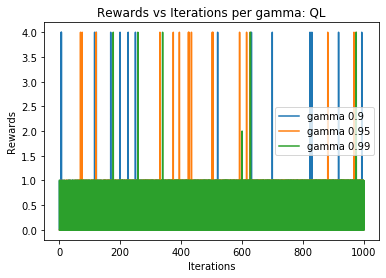

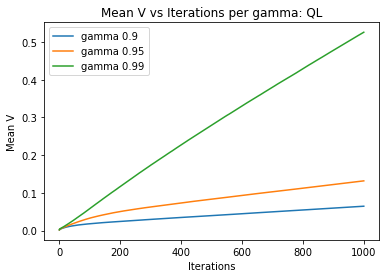

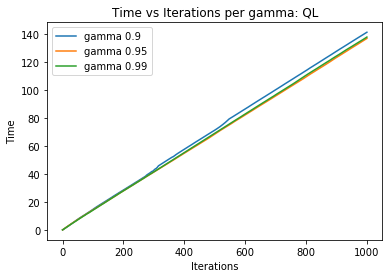

In [20]:
# QL
# hparams tuning
# gamma
gamma = [.9, .95, .99]

#stopping factor
#epsilon = [.01, .001, .0001, .00001]

for g in gamma:
    ql = mdptoolbox.mdp.QLearning(trans_m, reward_m, gamma=g, n_iter=1000000)
    ql.run()
    
    # these numbers are huge. Try scaling down so they fit the x axis
    ql_iters = [stat['Iteration'] / 1000 for stat in ql.run_stats] 
    
    reward_stats = [stat['Reward'] for stat in ql.run_stats]
    plt.figure(1)
    plt.plot(ql_iters, reward_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Rewards vs Iterations per gamma: QL")
    plt.ylabel("Rewards")
    plt.xlabel("Iterations")
    plt.savefig('../images/ql_forest/Rewards_vs_Iterations_ql_gamma.png')
    
    
    meanv_stats = [stat['Mean V'] for stat in ql.run_stats]
    plt.figure(2)
    plt.plot(ql_iters, meanv_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Mean V vs Iterations per gamma: QL")
    plt.ylabel("Mean V")
    plt.xlabel("Iterations")
    plt.savefig('../images/ql_forest/MeanV_vs_Iterations_ql_gamma.png')
    
    time_stats = [stat['Time'] for stat in ql.run_stats]
    plt.figure(3)
    plt.plot(ql_iters, time_stats, label="gamma " + str(g))
    plt.legend()
    plt.title("Time vs Iterations per gamma: QL")
    plt.ylabel("Time")
    plt.xlabel("Iterations")
    plt.savefig('../images/ql_forest/Time_vs_Iterations_ql_gamma.png')




In [24]:
# Show Optimal policy
ql = mdptoolbox.mdp.QLearning(trans_m, reward_m, gamma=.99, n_iter=1000000)
ql.run()
print('Time: ' + str(ql.time))
print('Policy: ' + str(ql.policy))
# Did they converge to the same policy?
print(ql.policy == pi.policy)
print(ql.policy == vi.policy)

Time: 139.5736632347107
Policy: (0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0